# **Lab02 - Regression Report**

**Task description:**

You are provided with a dataset (https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set) containing various features related to real estate properties in Sindian District. Your task is to build a linear regression model to predict the house price of a unit area based on the given features.



## **1.       Introduction**

Objective: To understand and implement a linear regression model for real
estate valuation using a dataset collected from Sindian District, New Taipei City, Taiwan. Particularly, it is to build a linear regression model to predict the house price of unit area based on the given features.

## **2.       About Dataset**

This dataset is about **"Y house price of unit area"** based on 6 features:

*   X1 transaction date
*   X2 house age
*   X3 distance to the nearest MRT station
*   X4 number of convenience stores
*   X5 latitude
*   X6 longitude

In this dataset, there are no categorical features. All are numerical value and in continuous, except 'X4' is integer value.

## **3.       Methodology**

### **3.1.      Data Preprocessing:**

The data has been processed to remove unusual values and unimportant input variables using the **Feature Selection - Pearson Correlation method**.
*       Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables. It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

In this study, i analyze the correlation between features and the target variable. Then, select relevant features that are more than **0.5** correlated with the target variable. As a result, i have filtered out ***4 features*** (X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores)

### **3.2.      Model Training and Evaluation:**

I employ the train test split method, followed by training utilizing a linear regression model. Subsequently, I utilize evaluation metrics (MAE, MSE, RMSE, R2_cscore) to assess the model's performance, comparing the outcomes between train and test subsets to identify potential overfitting.

*       Mean Absolute Error (MAE): measures the average magnitude of the errors in a set of predictions, without considering their direction. It is the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.title

*       Mean squared error (MSE): To calculate the MSE, you take the difference between your model’s predictions and the ground truth, square it, and average it out across the whole dataset.

*       Root mean squared error (RMSE): RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It is the square root of the average of squared differences between prediction and actual observation.

*       R-Squared (R2_score): shows how well the model predicts the outcome of the dependent variable. R-Squared values range from 0 to 1.

Finally, use the lasso and ridge models with hyperparameter tuning based on  cross-validation, grid search to improve the model. By comparing the evaluation results obtained from these models with those from the linear regression, i draw final conclusions regarding the effectiveness of each approach in addressing the task at hand.


 ## **4.       Result:**

The linear regression model produces prediction results that match the data quite well with ***0.605*** in R2_score, but there are still quite a few data points that deviate from the prediction line in visualization.

Lasso Regression and Ridge Regression give better results than linear regression model. However the difference between them is very very small. Besides, the alpha of the two hyperparameter tuning models is also small, in the lasso regression model the alpha almost approaches 0. This proves that the linear regression model does not suffer from overfitting.

**Therefore, we may only need a linear regression model for this prediction problem because of *its simplicity, ease of understanding, and ease of implementation*. However, the linear regression model is quite sensitive to outliers. Returning to the EDA section, we see that the data also has few outliers. If we expand the data set in practice but do not want to lose information when removing outliers, we should consider the ridge regression model.**


 ## **5.       Conclusion:**

The implementation of linear regression, Lasso regression, and Ridge regression models provided valuable insights into real estate valuation based on the dataset collected from Sindian District, New Taipei City, Taiwan.

In conclusion, the linear regression model serves as a viable option for this real estate valuation. Further exploration and refinement of the models could potentially lead to even better performance in predicting house prices of unit area.



# **Coding**

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Exploration**
*   Load the dataset into a suitable data structure (e.g., pandas DataFrame).
*   Explore the dataset to understand its structure,feature types, and basic statistics.
*   Check for missing values and handle them appropriately if necessary

In [70]:
# load the dataset
data_path = '/content/Real estate valuation data set.xlsx';
data = pd.read_excel(data_path)

In [71]:
# real estate df
RE = pd.DataFrame(data)

### Exploratory Data Analysis (EDA)

In [72]:
# check dimensions of the dataset (rows and columns)
print("Real_Estate dataset: ",RE.shape)

Real_Estate dataset:  (414, 8)


In [73]:
RE.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [74]:
# view information such as data field properties and count
RE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


This dataset is about house price of unit area based on 6 features:

*   X1 transaction date
*   X2 house age
*   X3 distance to the nearest MRT station
*   X4 number of convenience stores
*   X5 latitude
*   X6 longitude

In this dataset, there are no categorical features. All are numerical value and in continuous, except X4 is integer value.

There is also a 'No' column that acted as 'id' role, so we can delete it.

In [75]:
# check for missing values
RE.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [76]:
# check for duplicated values
RE.duplicated().sum()

0

So, we can see there isn't any missing or duplicated values in this dataset

In [77]:
# statistical discription of data
RE.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [78]:
feature_list = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
target = 'Y house price of unit area'

To check the correlation between each features and features with house price, i displayed 6 scatter plots to see:

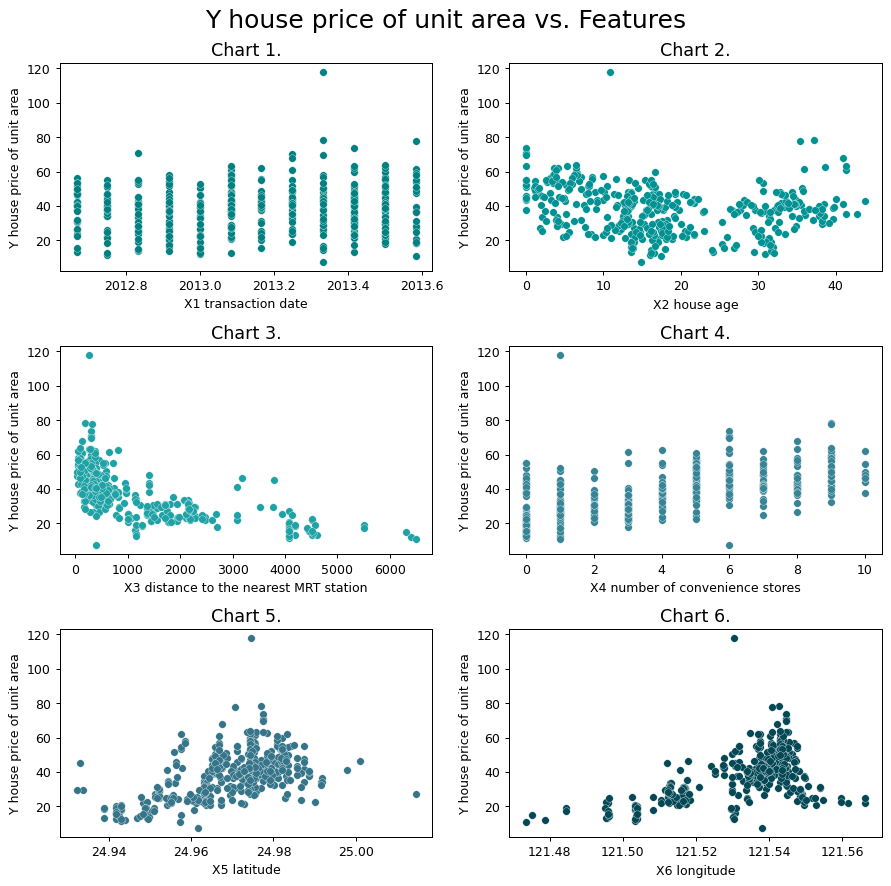

In [79]:
fig, ax = plt.subplots(nrows = 3 , ncols = 2, figsize = (10,10), dpi=90)
c = ['#008081','#009192','#1fa2a5','#388497','#367589','#044855']

for i in range(len(feature_list)):
    row = i//2
    col = i%2
    ax[row,col].scatter(RE[feature_list[i]], RE[target], color=c[i], edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('Chart {}.'.format(i+1), size = 14)
    ax[row,col].set_xlabel(feature_list[i], size = 10)
    ax[row,col].set_ylabel(target, size = 10)
    # ax[row,col].grid()

plt.suptitle('Y house price of unit area vs. Features', size = 20)
plt.tight_layout()
plt.show()


According to observing the data on the scatter chart, we can see:
* Chart 1: We see almost no special correlation between transaction date and house price.
* Chart 2: There is a very small negative correlation between house age and house price.
* Chart 3: house price is inversely proportional to distance to the nearest MRT station, it mean, if the distance to the MRT station increases, the house price will decrease.
* Chart 4: In contrast to chart 3, there is a positive correlation between number of convenience stores and house price.
* Chart 5 & 6: We can see a positive correlation between house price and latitude, longitude.

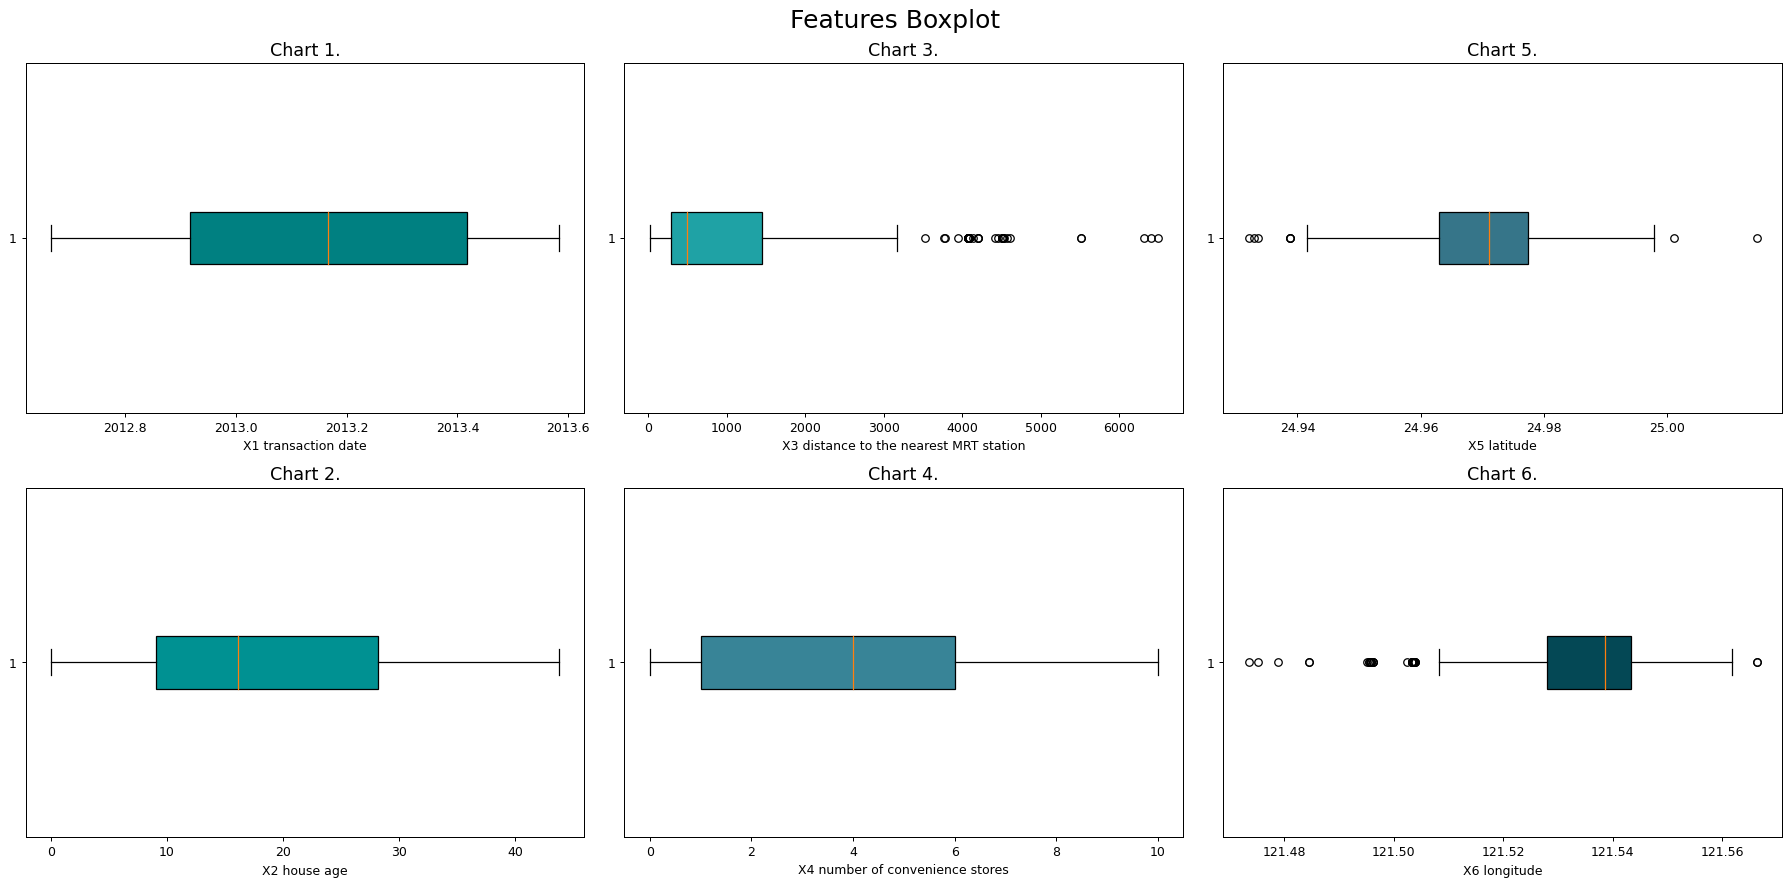

In [80]:
fig, ax = plt.subplots(nrows = 2 , ncols = 3, figsize = (20,10), dpi=90)
c = ['#008081','#009192','#1fa2a5','#388497','#367589','#044855']

for i in range(len(feature_list)):
    col = i//2
    row = i%2
    ax[row, col].boxplot(RE[feature_list[i]], vert=False, patch_artist=True, boxprops=dict(facecolor=c[i]))
    ax[row,col].set_title('Chart {}.'.format(i+1), size = 14)
    ax[row,col].set_xlabel(feature_list[i], size = 10)
    # ax[row,col].grid()

plt.suptitle('Features Boxplot', size = 20)
plt.tight_layout()
plt.show()

In [81]:
# outliers

for column in RE.columns:
    # IQR
    Q1 = np.percentile(RE[column], 25)
    Q3 = np.percentile(RE[column], 75)
    IQR = Q3 - Q1

    # find outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = RE[(RE[column] < lower_bound) | (RE[column] > upper_bound)]

    # outliers percentage
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(RE[column]))*100
    print(column, ': ', percentage_outliers)

No :  0.0
X1 transaction date :  0.0
X2 house age :  0.0
X3 distance to the nearest MRT station :  8.937198067632849
X4 number of convenience stores :  0.0
X5 latitude :  1.932367149758454
X6 longitude :  8.454106280193237
Y house price of unit area :  0.7246376811594203


## **Data Preprocessing:**
*   Normalize the numerical features if required to ensure all features are on the same scale.
*   Encode categorical features if any (in this dataset, there are no categorical features).
*   Split the dataset into features (X) and the target variable (Y).

In [82]:
# drop id
RE.drop(columns=['No'], inplace=True, axis=1)

In [83]:
RE.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [84]:
from sklearn.preprocessing import MinMaxScaler

# intinialize MinMaxScaler
mms = MinMaxScaler()

# normalize
mms.fit(RE)
normalized = mms.transform(RE)

# convert to df after normalized
all_columns = RE.columns.tolist()
RE_normalized = pd.DataFrame(normalized, columns = all_columns)
RE_normalized

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.272727,0.730594,0.009513,1.0,0.616941,0.719323,0.275705
1,0.272727,0.445205,0.043809,0.9,0.584949,0.711451,0.314832
2,1.000000,0.303653,0.083315,0.5,0.671231,0.758896,0.361237
3,0.909091,0.303653,0.083315,0.5,0.671231,0.758896,0.429481
4,0.181818,0.114155,0.056799,0.5,0.573194,0.743153,0.323021
...,...,...,...,...,...,...,...
409,0.363636,0.312785,0.627820,0.0,0.114881,0.326504,0.070974
410,0.000000,0.127854,0.010375,0.9,0.512118,0.750162,0.385805
411,0.636364,0.429224,0.056861,0.7,0.571498,0.715225,0.300273
412,0.363636,0.184932,0.012596,0.5,0.420141,0.723959,0.408553


## **Feature Selection/Engineering:**
*   Analyze the correlation between features and the target variable.
*   Select relevant features that are highly correlated with the target variable.
*   Consider adding new features if they could improve model performance (e.g., feature combinations).

In [85]:
# Correlation
correlation_matrix = RE_normalized.corr()

To better understand the correlation between features with each other and with house price, we draw a heatmap:

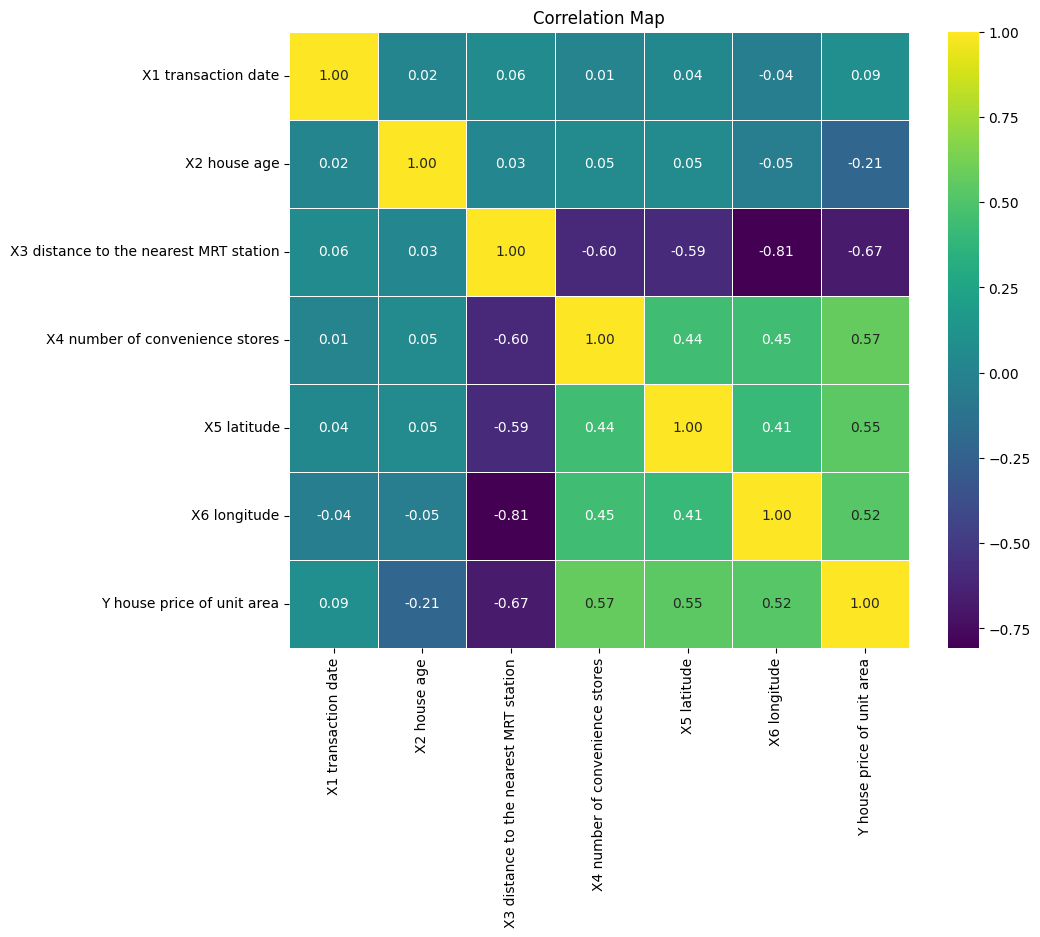

In [86]:
#correlation map
f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, linewidths = 0.5, fmt = ".2f", ax = ax, cmap = 'viridis')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title('Correlation Map')
plt.show()

In [87]:
# correlation of all features with target
colleration_target = correlation_matrix['Y house price of unit area'].abs().sort_values(ascending=False)

In [88]:
colleration_target

Y house price of unit area                1.000000
X3 distance to the nearest MRT station    0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X2 house age                              0.210567
X1 transaction date                       0.087529
Name: Y house price of unit area, dtype: float64

In [89]:
# Returns the dataframe after dropping features with smaller correlation than the given value.
def correlation(dataset, cor, rows):
    df = dataset.copy()
    col_corr = set()  # For storing unique value
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, rows]) < cor: # absolute values to handle positive and negative correlations
            colname = corr_matrix.columns[i]
            col_corr.add(colname)
    df.drop(col_corr,axis = 1,inplace = True)
    return df

In [90]:
# dropping features have correlation < 0.5
RE_training = correlation(RE_normalized, 0.5, 6)

In [91]:
RE_training

,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.009513,1.0,0.616941,0.719323,0.275705
1,0.043809,0.9,0.584949,0.711451,0.314832
2,0.083315,0.5,0.671231,0.758896,0.361237
3,0.083315,0.5,0.671231,0.758896,0.429481
4,0.056799,0.5,0.573194,0.743153,0.323021
...,...,...,...,...,...
409,0.627820,0.0,0.114881,0.326504,0.070974
410,0.010375,0.9,0.512118,0.750162,0.385805
411,0.056861,0.7,0.571498,0.715225,0.300273
412,0.012596,0.5,0.420141,0.723959,0.408553


In [92]:
# split data into features and target
X = RE_training.drop(["Y house price of unit area"] , axis = 1)
y = RE_training["Y house price of unit area"]

In [93]:
X.shape

(414, 4)

In [94]:
y.shape

(414,)

## **Model Training:**
*     Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing).
*     Initialize a linear regression model (e.g., using scikit-learn).
*     Train the model using the training data.


In [95]:
from sklearn.model_selection import train_test_split

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:
X_train.shape

(331, 4)

In [97]:
X_test.shape

(83, 4)

In [98]:
y_train.shape

(331,)

In [99]:
y_test.shape

(83,)

In [100]:
from sklearn.linear_model import LinearRegression

# initialize a linear regression model
model_reg = LinearRegression(fit_intercept=False) # fit: find optimal value

# train model using training data X_train, y_train
model_reg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

## Model Evaluation:
*     Evaluate the trained model using appropriate metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared.
*     Visualize the actual vs. predicted house prices to understand the model's performance visually.


In [101]:
model_name = ['Linear Regression', 'Lasso', 'Ridge']

In [102]:
# using model to predict house price of X_test
y_pred_reg = model_reg.predict(X_test)

In [103]:
# show coef_
def model_coef(model, model_name):
    coef = model.coef_

    return pd.DataFrame(coef, index = [col for col in X.columns], columns = [model_name])

In [104]:
model_coef(model_reg, 'Linear Reg.')

,Linear Reg.
X3 distance to the nearest MRT station,-0.066727
X4 number of convenience stores,0.116415
X5 latitude,0.257152
X6 longitude,0.190848


In [105]:
# evaluate the trained model using appropriate metrics: MSE, MAE, R-squared
from sklearn import metrics

# computing and return DataFrame of appropriate metrics function
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [106]:
model_evaluation(model_reg, X_test, y_test, 'Linear Reg.')

,Linear Reg.
MAE,0.057651
MSE,0.005477
RMSE,0.074006
R2-Score,0.605683


In [107]:
# compare r2_score train_test
def train_test_comp(model, X_train, y_train, X_test, y_test):
    train_mse = metrics.mean_absolute_error(y_train, model.predict(X_train))
    test_mse = metrics.mean_absolute_error(y_test, model.predict(X_test))

    print('train_mse: ', train_mse)
    print('test_mse: ', test_mse)

In [108]:
train_test_comp(model_reg, X_train, y_train, X_test, y_test)

train_mse:  0.06563378144015414
test_mse:  0.05765064217358964


The MSE of both datasets is relatively similar, the model can be judged to be stable, and its performance can be relatively good on both training data and test data.

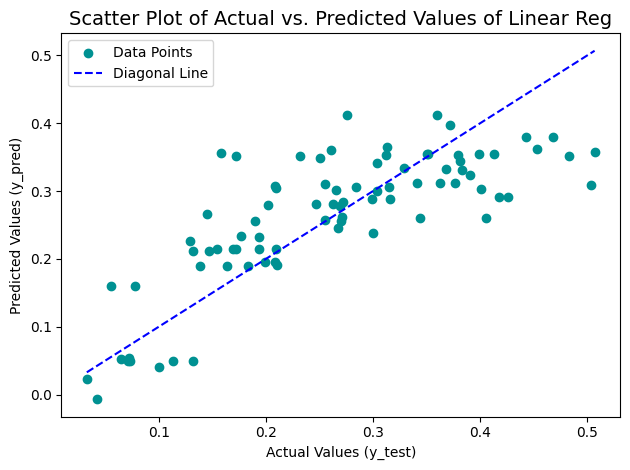

In [109]:
plt.scatter(y_test, y_pred_reg, color = '#009192', label='Data Points')
# diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='b', linestyle='--', label='Diagonal Line')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of Actual vs. Predicted Values of Linear Reg', size = 14)
plt.legend()

plt.tight_layout()
plt.show()

## Hyperparameter Tuning (Optional):
*     Experiment with different hyperparameters of the linear regression model (if any) or other variants of linear model, regularization, etc to improve performance.
*     Utilize techniques like cross-validation, grid search to find the optimal hyperparameters.

In [110]:
from sklearn.model_selection import GridSearchCV, KFold

### Lasso vs. Ridge

In [111]:
from sklearn.linear_model import Lasso

param_grid = dict()
param_grid['alpha'] = np.arange(0,1,0.01)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(Lasso(), param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Model evaluate
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Training final model
final_lasso = Lasso(alpha=grid_search.best_params_['alpha'])
final_lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+00, tolerance: 4.218e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

Best hyperparameters: {'alpha': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+00, tolerance: 5.155e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_c

Lasso(alpha=0.0)

In [112]:
from sklearn.linear_model import Ridge

param_grid = dict()
param_grid['alpha'] = np.arange(0,1,0.01)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(Ridge(), param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Model evaluate
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Training final model
final_ridge = Ridge(alpha=grid_search.best_params_['alpha'])
final_ridge.fit(X_train, y_train)

Best hyperparameters: {'alpha': 0.73}


Ridge(alpha=0.73)

### Model Comparison

In [113]:
evaluation_df = pd.DataFrame()

evaluation_df = pd.concat([model_evaluation(model_reg, X_test, y_test, 'Linear Reg.'),  model_evaluation(final_ridge, X_test, y_test, 'Ridge'), model_evaluation(final_lasso, X_test, y_test, 'Lasso')], axis=1)

In [114]:
evaluation_df

,Linear Reg.,Ridge,Lasso
MAE,0.057651,0.056194,0.056811
MSE,0.005477,0.005240,0.005291
RMSE,0.074006,0.072386,0.072739
R2-Score,0.605683,0.622756,0.619069


In [115]:
y_pred_ridge = final_ridge.predict(X_test)
y_pred_lasso = final_lasso.predict(X_test)

In [116]:
y_pred_list = []

y_pred_list.append(y_pred_reg)
y_pred_list.append(y_pred_lasso)
y_pred_list.append(y_pred_ridge)

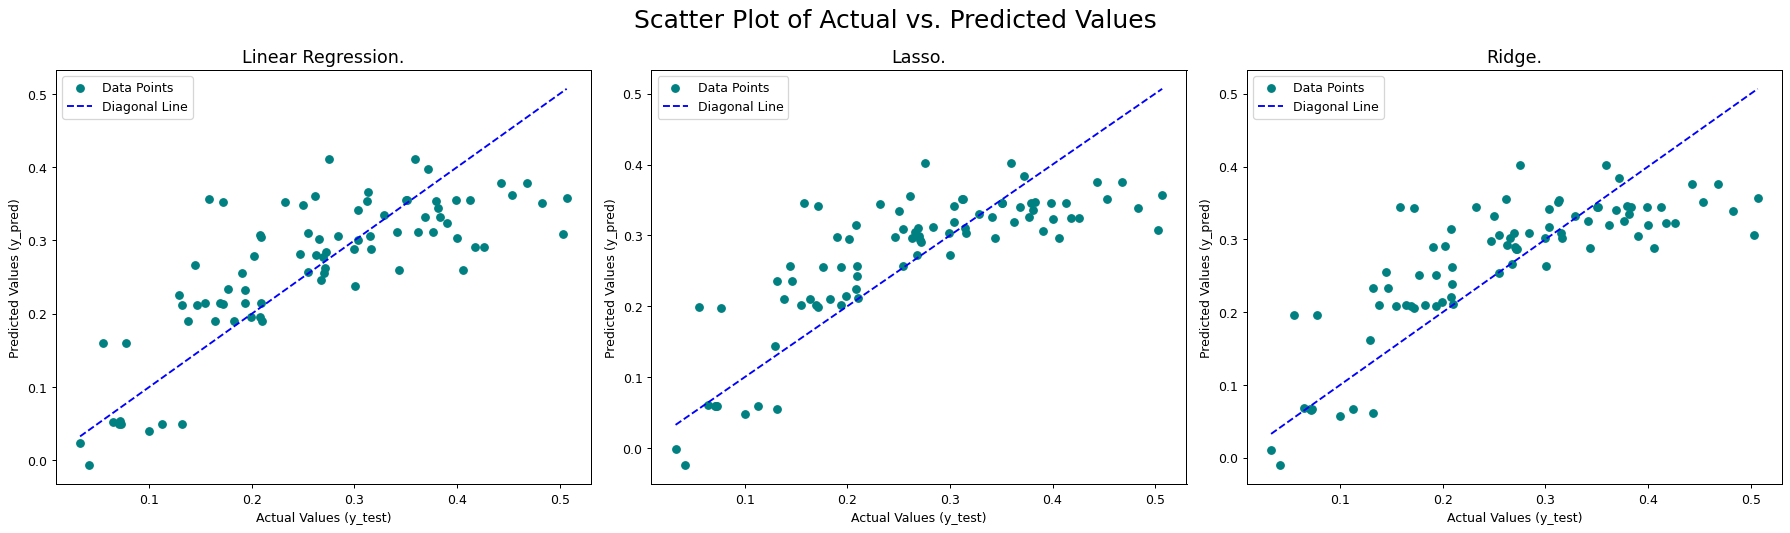

In [117]:
fig, ax = plt.subplots(nrows = 1 , ncols = 3, figsize = (20,6), dpi=90)

for i in range(len(y_pred_list)):
    # ax[row,col].grid()
    ax[i].scatter(y_test, y_pred_list[i], color = '#008081', label='Data Points')
    # diagonal line
    ax[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='b', linestyle='--', label='Diagonal Line')
    ax[i].set_xlabel('Actual Values (y_test)')
    ax[i].set_ylabel('Predicted Values (y_pred)')
    ax[i].set_title('{}.'.format(model_name[i]), size = 14)
    ax[i].legend()

plt.suptitle('Scatter Plot of Actual vs. Predicted Values', size = 20)
plt.tight_layout()
plt.show()

All 3 plots are almost similar, however we can see that on the lasso and ridge after hyperparameter tuning, the data points are less discrete, clustered closer together and closer to the diagonal line.

## Conclusion and Further Analysis:
*     Summarize the findings from the model evaluation.
*     Discuss any limitations or assumptions made during the modeling process.
*     Propose potential avenues for further analysis or model improvement.

In [118]:
evaluation_df

,Linear Reg.,Ridge,Lasso
MAE,0.057651,0.056194,0.056811
MSE,0.005477,0.005240,0.005291
RMSE,0.074006,0.072386,0.072739
R2-Score,0.605683,0.622756,0.619069



*     Overall, Ridge Regression and Lasso Regression seem to perform better than Linear Regression on all metrics. They have lower MAE, MSE, RMSE and higher R2_score, indicating better prediction performance and can generalize better to unseen data.

* However, the evaluation indexes of the three models have very small differences and are almost the same. At the same time, Lasso's alpha almost approaches 0 to achieve optimality. This shows that the Linear Regression model is well trained and does not cause overfitting.

**Limitations or assumptions made during the modeling process.**

*     Common assumption is the linearity of processes. This assumption makes the model easier to understand and predict, but it may not capture the complex, non-linear relationships that often exist in nature.

*     For example, it might assume that a certain level of pollution will always lead to a certain level of damage to wildlife. This assumption allows the model to make predictions, but it may not account for the unpredictability and randomness that can occur in nature.

*     The appearance of unprocessed outlier data points greatly affects the linear regression model

**Propose potential avenues for further analysis or model improvement.**

*       Continued research to improve model usability and performance.

*       Test the model on external data sets to ensure generality.

*       Evaluate the practical application of the model in real situations.

*       Try to use another feature selection method like Lasso model instead of Pearson correlation.